# MNIST 데이터 다운로드

In [88]:
# MNIST 데이터를 다운로드 한다.
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Populating the interactive namespace from numpy and matplotlib


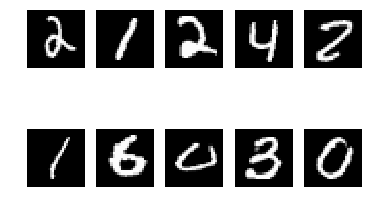

In [89]:
%pylab inline
import numpy as np

# 임의로 선택한 10개의 MNIST 데이터를 화면에 보여준다.
for c in range(1, 11):
    subplot(2, 5, c)
    i = randint(mnist.test.num_examples)
    im = np.reshape(mnist.test.images[i], [28, 28])
    axis("off")
    imshow(im, cmap='gray')

# TensorFlow 라이브러리 추가

In [90]:
# TensorFlow 라이브러리를 추가한다.
import tensorflow as tf

# Softmax Classifier를 위한 변수들 설정

<img src="https://www.tensorflow.org/images/softmax-regression-scalargraph.png" width="800">

In [91]:
# 변수들을 설정한다.
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [92]:
# cross-entropy loss를 설정한다.
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [93]:
# 경사하강법으로 모델을 학습한다.
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


# 정확도 출력

In [95]:
# 학습된 모델이 얼마나 정확한지를 출력한다.
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9178
